<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Stuff" data-toc-modified-id="Import-Stuff-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Stuff</a></span><ul class="toc-item"><li><span><a href="#NOTE" data-toc-modified-id="NOTE-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>NOTE</a></span></li><li><span><a href="#Anonymous-Functions" data-toc-modified-id="Anonymous-Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Anonymous Functions</a></span></li><li><span><a href="#Named-Functions" data-toc-modified-id="Named-Functions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Named Functions</a></span></li></ul></li><li><span><a href="#Convergence-Test" data-toc-modified-id="Convergence-Test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Convergence Test</a></span><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Potential-Maps-vs-Relative-Angle" data-toc-modified-id="Potential-Maps-vs-Relative-Angle-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Potential Maps vs Relative Angle</a></span><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Compare-Zeroed-Antiferro-Maps" data-toc-modified-id="Compare-Zeroed-Antiferro-Maps-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compare Zeroed Antiferro Maps</a></span><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li></ul></div>

# Import Stuff

In [11]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
pd.options.mode.chained_assignment = None # Suppresses annoying warnings

sns.set(font_scale=1.5)
sns.set_context("poster")

with open("tidy_data/pmap_finer_resolution_data.pkl","rb") as _filein:
    raw_data = pkl.load(_filein)
    
raw_df = pd.DataFrame(raw_data)
raw_df.fill = raw_df.fill.apply(int)
raw_df.config = raw_df.config.apply(int)
raw_df.head()

,config,coupling,energy,fill
0,39,antiferro,-934.131570,1110
1,16,antiferro,-948.451377,1111
2,34,antiferro,-919.810100,1100
3,30,antiferro,-948.451396,1111
4,21,antiferro,-905.487958,1000


## Anonymous Functions

In [12]:
filter_by_fill = lambda fill, df=raw_df: df[df.fill == fill]


## Named Functions

In [22]:

def zero_energy(fill):
    df = filter_by_fill(fill)
    df.sort_values("config",axis=0,inplace=True)
    zero_en = df.energy.values[0]
    df.energy -= zero_en
    scale = len(df.config)-1
    df.config *= 0.01
    
    return df
def plot_zeroed_comparison():
    fig = plt.figure(figsize=(16,12))
    ax = plt.gca()

    for fill in set(raw_df.fill.values):
        sns.lineplot(x="config",y="energy",data=zero_energy(fill),ax=ax,label="Fill: {}".format(fill))

    ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    ax.set(xlabel="Rotation Angle [rad]",ylabel="Energy [eV]")


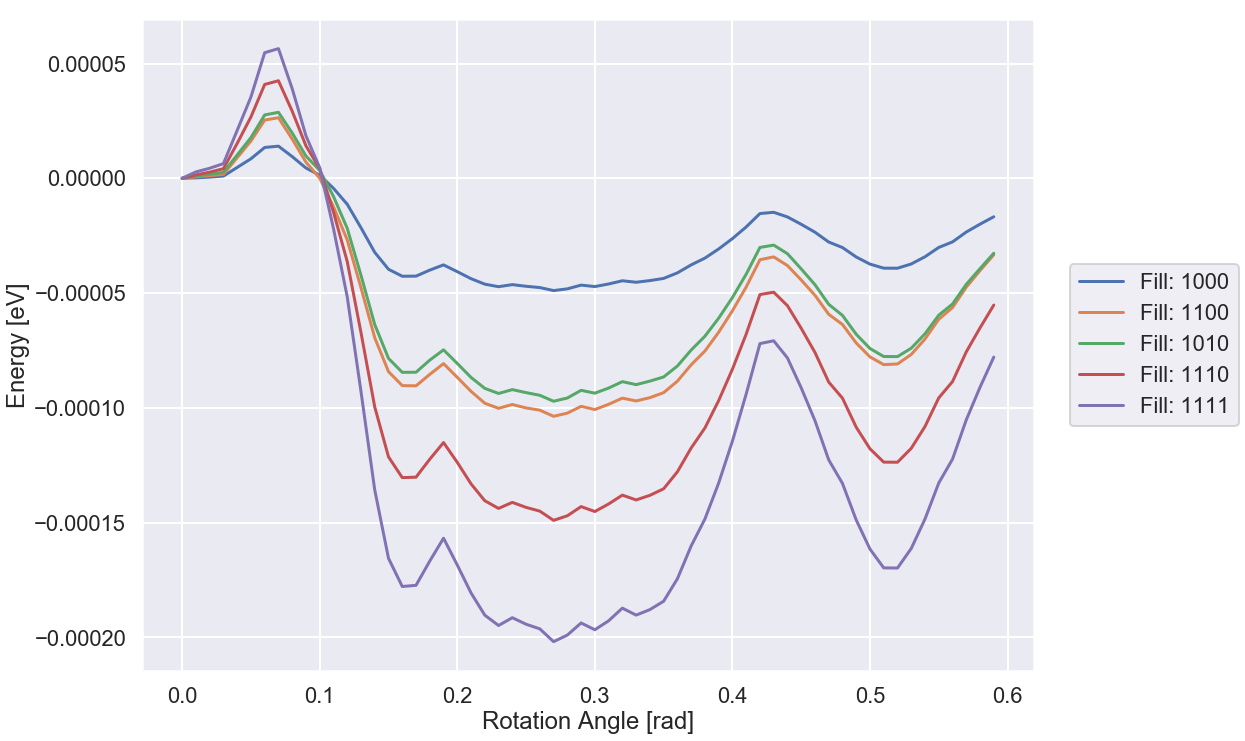

In [23]:

plot_zeroed_antiferro_comparison()